In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Politics

## Russian elections
**It's often said that Russian elections are rigged so I will use Benford's law to find out if we can see some irregularities in votes.**

In [105]:
russian_data = pd.read_csv("russian_elections.csv")
usa_data = pd.read_csv("usa_elections.csv", sep=";")

In [106]:
russian_data.head()

,ps_id,region_name,subregion_name,Baburin Sergei Nikolaevich,Grudinin Pavel Nikolaevich,Zhirinovskiy Vladimir Volfovich,Putin Vladimir Vladimirovich,Sobchak Ksenia Anatolyevna,Suraikin Maksim Aleksandrovich,Titov Boris Yurievich,...,Number of voters enlisted,Number of ballot papers in portable ballot boxes,Number of ballot papers given inside the polling station,Number of ballot papers given outside the polling station,Number of ballot papers given for advance voting,Number of excessive ballot papers,Number of ballot papers acquired at the polling station,Number of invalid ballot papers,Number of unused ballot papers,Number of lost ballot papers
0,713,Altajskij kraj,Bystroistokskaa,1,109,42,398,2,3,0,...,815,139,421,139,0,0,750,5,190,0
1,714,Altajskij kraj,Bystroistokskaa,4,27,27,199,0,3,0,...,355,38,224,38,0,0,350,2,88,0
2,715,Altajskij kraj,Bystroistokskaa,3,100,47,325,2,1,2,...,812,63,424,63,0,0,750,6,263,0
3,716,Altajskij kraj,Bystroistokskaa,2,131,51,420,1,5,1,...,960,56,568,56,0,0,900,7,276,0
4,717,Altajskij kraj,Bystroistokskaa,6,155,66,406,5,2,2,...,1034,65,586,65,0,0,1000,8,349,0


In [107]:
usa_data.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Vermont,VT,Sutton,95000197.0,Republican,John Kasich,20,0.227
1,Vermont,VT,Tunbridge,95000204.0,Republican,John Kasich,36,0.319
2,Vermont,VT,Weathersfield,95000220.0,Republican,Ted Cruz,46,0.111
3,Vermont,VT,Weston,95000228.0,Republican,John Kasich,32,0.471
4,Vermont,VT,Whiting,95000233.0,Republican,Ben Carson,0,0.000


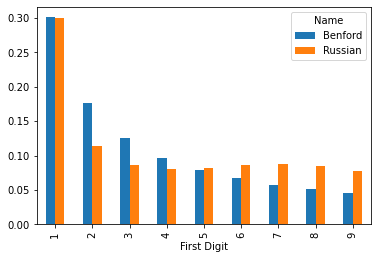

In [109]:
russian_digits = russian_data["Putin Vladimir Vladimirovich"].dropna().astype(str).str[0].value_counts(normalize=True)
russian_digits = russian_digits.drop(russian_digits.index[9], axis=0) 
russian_digits = pd.DataFrame({"First Digit": russian_digits.index, "Proportion": russian_digits.values, "Name":"Russian"})
benford_nums = pd.DataFrame({"First Digit": ['1', '2', '3', '4', '5', '6', '7', '8', '9'], "Proportion": [.301, .176, .125, .097, .079, .067, .058, .051, .046], "Name":"Benford"})
data = pd.concat([benford_nums, russian_digits]).pivot("First Digit",  "Name", "Proportion")
data.plot(kind="bar")

## American elections 

